 - Autor: Jesus Armando Soria Martinez
 - Grupo: 5AV1
 - Carrera: Lic. Ciencia de Datos
 - Fecha de ultima modificacion: 20/01/2026


 🔗 [LinkedIn](http://www.linkedin.com/in/jesus-armando-soria-martinez-a9b786366)

  🔗 [GitHub](https://github.com/Soria-Jesus)

---

__PRÁCTICAS 1 y 2__
# __Análisis exploratorio, limpieza de datos, transformación de datos, e ingeniería de características.__

---

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import sys
from pathlib import Path

# Añade la raíz del proyecto al path para poder importar módulos desde src/
sys.path.append(str(Path("..").resolve()))

# Importa funciones de visualización personalizadas, definidas en el módulo src
from src import (
    distribuciones_numericas,
    distribuciones_categoricas_cortas,
    distribuciones_categoricas_largas,
    grafico_categoricos_y_objetivo
)

### Carga de Datos

In [3]:
ruta = "../data/used_cars_data.csv"
df = pd.read_csv(ruta)

## 1. Análisis exploratorio de datos (EDA, Exploratory Data Analysis)

- a. Indicar las características de cada una de las dimensiones del dataset. Es decir, describir qué representan, el tipo de dato utilizado para tal representación, si son numéricas o categóricas, etcétera.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


 - b. Desplegar los primeros 10 (top 10) registros del dataset.

In [5]:
df.head(10)

S.No.                                 Name    Location  Year  \
0      0               Maruti Wagon R LXI CNG      Mumbai  2010   
1      1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                         Honda Jazz V     Chennai  2011   
3      3                    Maruti Ertiga VDI     Chennai  2012   
4      4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5      5      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6      6               Nissan Micra Diesel XV      Jaipur  2013   
7      7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8      8  Volkswagen Vento Diesel Comfortline        Pune  2013   
9      9       Tata Indica Vista Quadrajet LS     Chennai  2012   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   
5              75000       LPG       Manual      First  21.1 km/kg   814 CC   
6              86999    Diesel       Manual      First  23.08 kmpl  1461 CC   
7              36000    Diesel    Automatic      First  11.36 kmpl  2755 CC   
8              64430    Diesel       Manual      First  20.54 kmpl  1598 CC   
9              65932    Diesel       Manual     Second   22.3 kmpl  1248 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74  
5   55.2 bhp    5.0        NaN   2.35  
6   63.1 bhp    5.0        NaN   3.50  
7  171.5 bhp    8.0    21 Lakh  17.50  
8  103.6 bhp    5.0        NaN   5.20  
9     74 bhp    5.0        NaN   1.95

 - c. Desplegar los últimos 10 (bottom 10) registros del dataset.

In [6]:
df.tail(10)

S.No.                                               Name    Location  \
7243   7243                     Renault Duster 85PS Diesel RxL     Chennai   
7244   7244                              Chevrolet Aveo 1.4 LS        Pune   
7245   7245                              Honda Amaze S i-Vtech       Kochi   
7246   7246                          Hyundai Grand i10 AT Asta  Coimbatore   
7247   7247                            Hyundai EON D Lite Plus  Coimbatore   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
7243  2015              70000    Diesel       Manual      First  19.87 kmpl   
7244  2009              45463    Petrol       Manual      First  14.49 kmpl   
7245  2015              44776    Petrol       Manual      First   18.0 kmpl   
7246  2016              18242    Petrol    Automatic      First   18.9 kmpl   
7247  2015              21190    Petrol       Manual      First   21.1 kmpl   
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats New_Price  Price  
7243  1461 CC   83.8 bhp    5.0       NaN    NaN  
7244  1399 CC   92.7 bhp    5.0       NaN    NaN  
7245  1198 CC   86.7 bhp    5.0       NaN    NaN  
7246  1197 CC     82 bhp    5.0       NaN    NaN  
7247   814 CC   55.2 bhp    5.0       NaN    NaN  
7248  1598 CC  103.6 bhp    5.0       NaN    NaN  
7249  1197 CC  103.6 bhp    5.0       NaN    NaN  
7250  1461 CC   63.1 bhp    5.0       NaN    NaN  
7251  1197 CC  103.6 bhp    5.0       NaN    NaN  
7252  2148 CC    170 bhp    5.0       NaN    NaN

 - d. Obtener la cantidad total de observaciones, la media, la desviación estándar, valor mínimo, valor máximo, moda, rango y sus cuartiles. (solo aplica para dimensiones numéricas).

In [7]:
# columnas numericas
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
columnas_numericas.describe()

S.No.         Year  Kilometers_Driven        Seats        Price
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000

e. Identificar la cantidad y porcentaje de valores nulos.

In [8]:
# Calcula la cantidad de valores nulos
valores_nulos = df.isnull().sum()
# Calcula el porcentaje de valores nulos
porcentaje_nulos = valores_nulos / len(df) * 100

tabla_nulos = pd.DataFrame({
    'Valores Nulos': valores_nulos,
    'Porcentaje Nulos': porcentaje_nulos
})

print(tabla_nulos)

                   Valores Nulos  Porcentaje Nulos
S.No.                          0          0.000000
Name                           0          0.000000
Location                       0          0.000000
Year                           0          0.000000
Kilometers_Driven              0          0.000000
Fuel_Type                      0          0.000000
Transmission                   0          0.000000
Owner_Type                     0          0.000000
Mileage                        2          0.027575
Engine                        46          0.634220
Power                         46          0.634220
Seats                         53          0.730732
New_Price                   6247         86.129877
Price                       1234         17.013650


 - f. Identificar la cantidad valores duplicados.

In [9]:
df.duplicated().sum()

0

 - g. Graficar la distribución de cada una de las dimensiones numéricas.

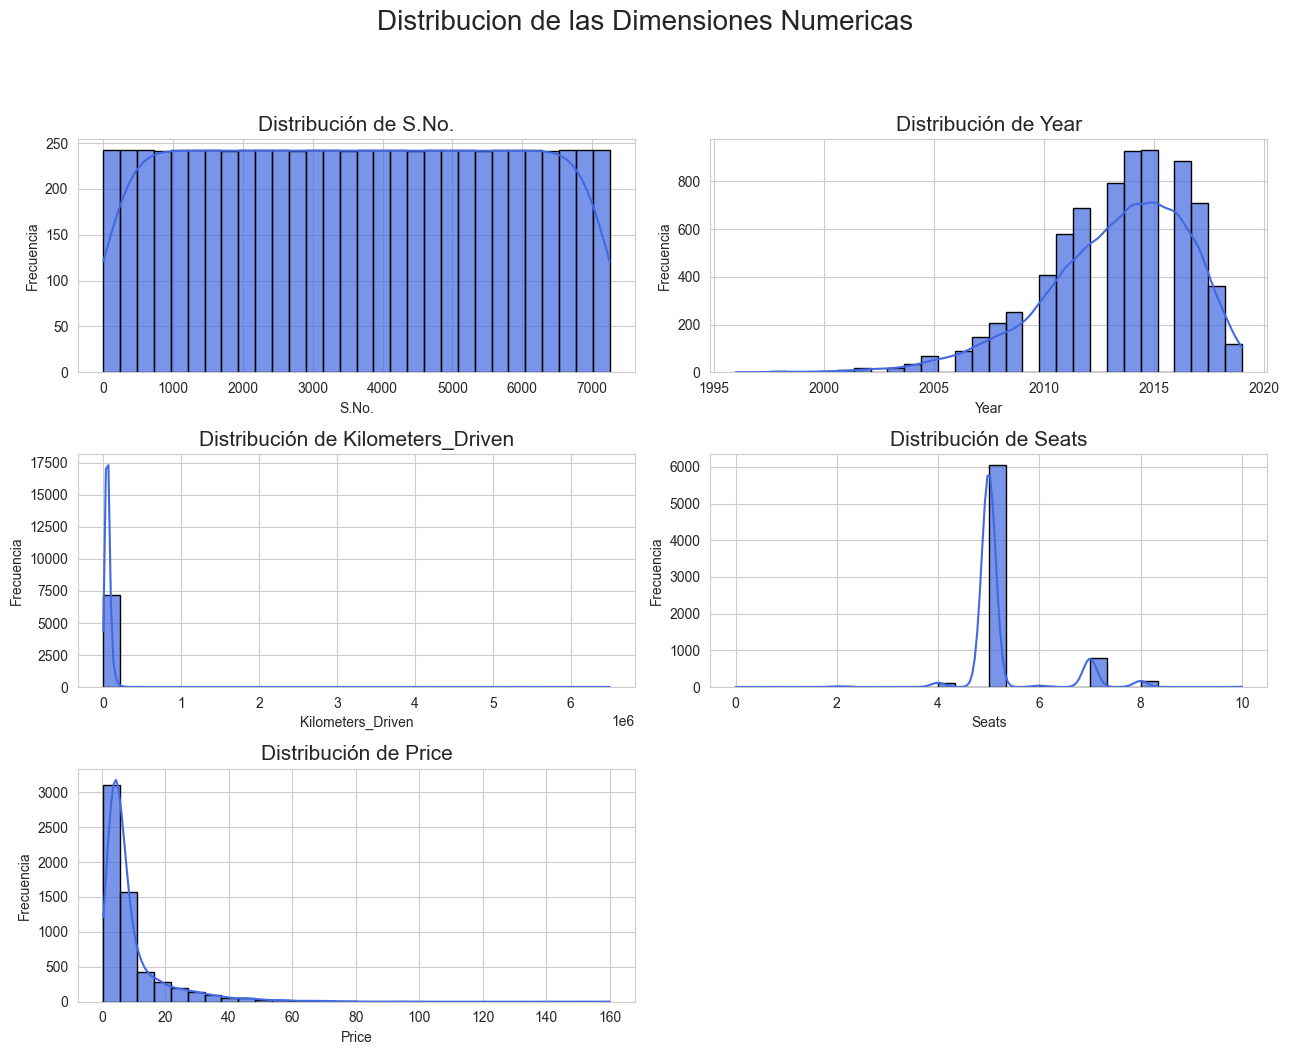

In [10]:
distribuciones_numericas(df, columnas_numericas, n_fil=3, n_col=2, tamanio=(13, 10))

 - h. Comparar entre sí cada una de las dimensiones numéricas (análisis bivariado) con un gráfico del tipo “pairplot”.

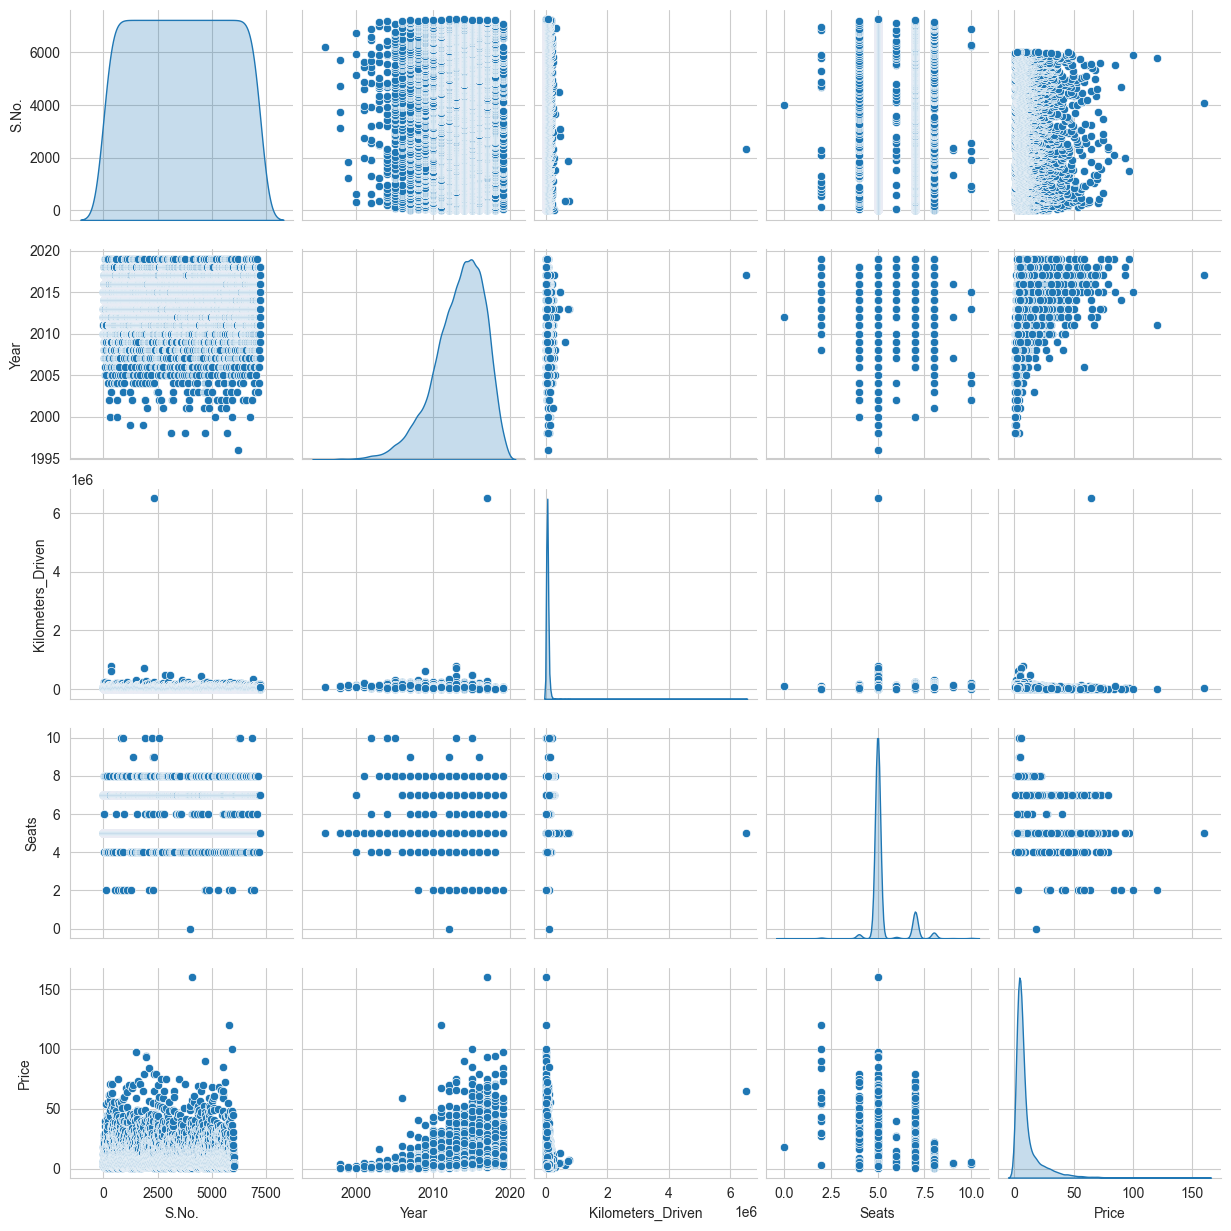

In [11]:
# Pairplot de las columnas numericas
sns.set_style("whitegrid")

sns.pairplot(df[columnas_numericas.columns], diag_kind='kde')   # Tipos de diagonal: kde, hist
#sns.pairplot(columnas_numericas)   # Otra forma de hacer lo mismo

plt.show()

 - i. Realizar un mapa de calor para identificar la correlación entre todas las variables numericas (análisis multivariado).

In [12]:
# Calcular la matriz de correlacion
correlacion = columnas_numericas.corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titulo
plt.title('Mapa de calor de correlacion', fontsize=15)
plt.show()

 - j. Graficar la distribución de cada una de las dimensiones categóricas.


In [13]:
# Selecciona todas las columnas categóricas
columnas_categoricas1 = df.select_dtypes(include=['object']).columns
columnas_categoricas1

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

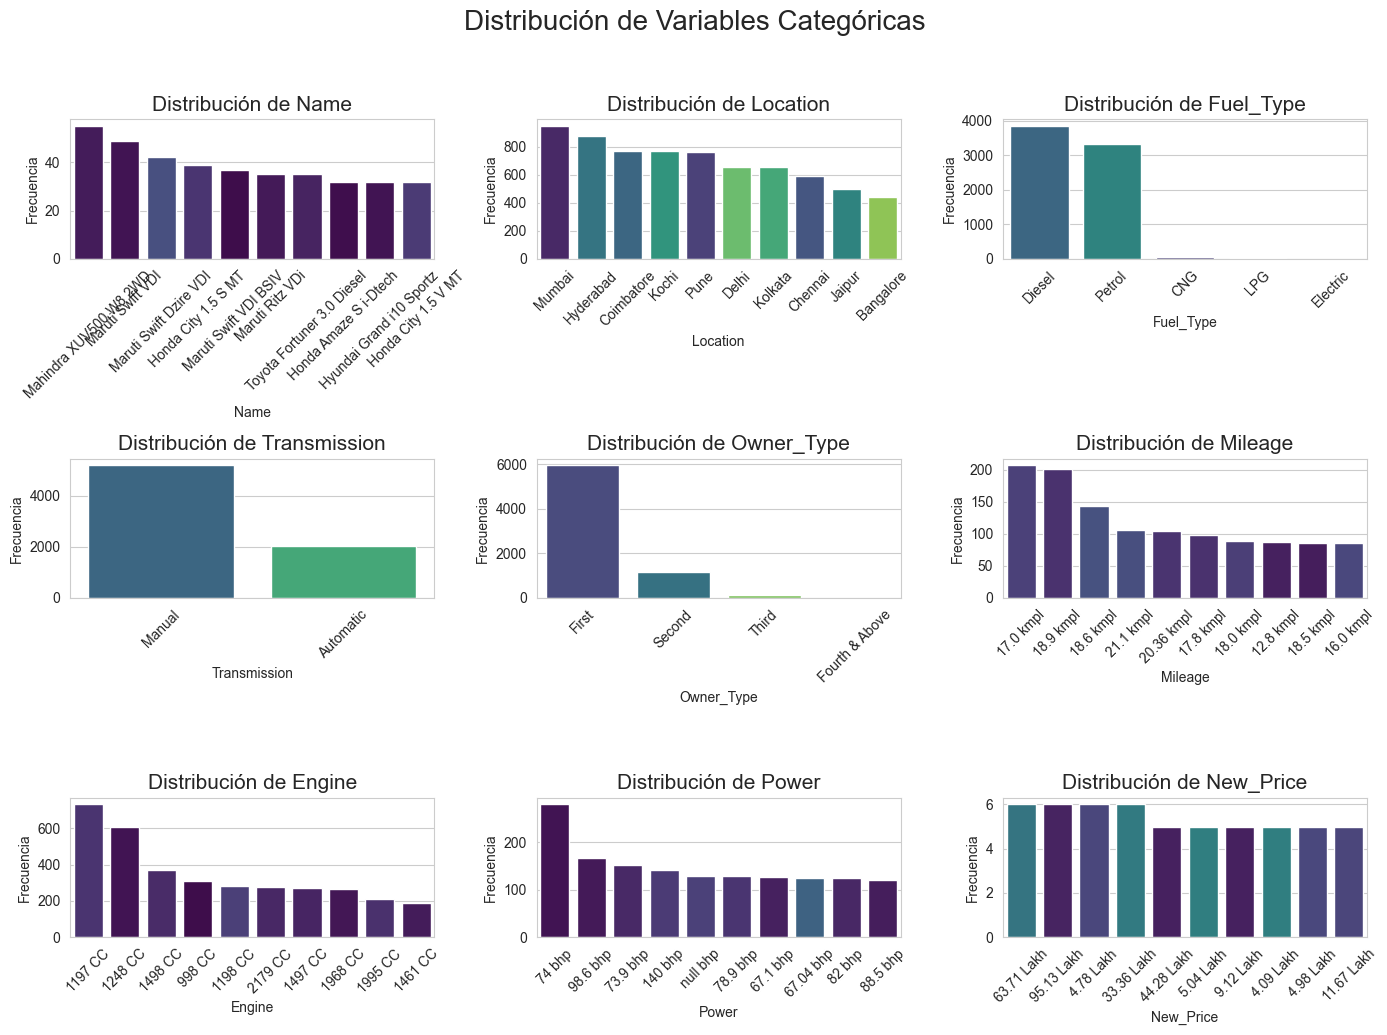

In [14]:
# Le paso a la funcion el parametro "top=10" para limitar las etiquetas de las dimensiones que contienen muchas. (para que se pueda ver bien la grafica).
distribuciones_categoricas_cortas(df, columnas_categoricas1, n_fil=3, n_col=3, tamanio=(14, 10), top=10)

k. Comparar cada una de las dimensiones categóricas (eje X) contra la dimensión
“Precio” (eje Y). Para ello se debe primero agrupar por categoría, después
obtener la media de la respectiva dimensión y ordenar los valores de mayor a
menor.

In [15]:
grafico_categoricos_y_objetivo(df, columnas_categoricas1, n_fil=3, n_col=3, tamanio=(14, 20), objetivo='Price', top=10)

In [16]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

## 2. Limpieza de datos

 a) Eliminar las dimensiones “S. No.” y “New Price”.


In [17]:
df = df.drop(columns=['S.No.', 'New_Price'])

b. Sustituir el nombre en inglés de cada dimensión por su traducción en español.

In [18]:
df = df.rename(columns={
    'S.No.': 'No.',
    'Name': 'Nombre',
    'Location': 'Ubicacion',
    'Year': 'Año',
    'Kilometers_Driven': 'Kilometros_Recorridos',
    'Fuel_Type': 'Tipo_de_Combustible',
    'Transmission': 'Transmision',
    'Owner_Type': 'Tipo_de_Propietario',
    'Mileage': 'Rendimiento',
    'Engine': 'Motor',
    'Power': 'Potencia',
    'Seats': 'Asientos',
    'New_Price': 'Precio_Nuevo',
    'Price': 'Precio'
})

In [19]:
df.head()

Nombre   Ubicacion   Año  Kilometros_Recorridos  \
0            Maruti Wagon R LXI CNG      Mumbai  2010                  72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015                  41000   
2                      Honda Jazz V     Chennai  2011                  46000   
3                 Maruti Ertiga VDI     Chennai  2012                  87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013                  40670   

  Tipo_de_Combustible Transmision Tipo_de_Propietario Rendimiento    Motor  \
0                 CNG      Manual               First  26.6 km/kg   998 CC   
1              Diesel      Manual               First  19.67 kmpl  1582 CC   
2              Petrol      Manual               First   18.2 kmpl  1199 CC   
3              Diesel      Manual               First  20.77 kmpl  1248 CC   
4              Diesel   Automatic              Second   15.2 kmpl  1968 CC   

    Potencia  Asientos  Precio  
0  58.16 bhp       5.0    1.75  
1  126.2 bhp       5.0   12.50  
2   88.7 bhp       5.0    4.50  
3  88.76 bhp       7.0    6.00  
4  140.8 bhp       5.0   17.74

c. Eliminar todas las observaciones que únicamente tengan valores nulos en la
dimensión “Asientos”. Es decir, además de observaciones con valores nulos en
la dimensión “Asientos”, también los hay en otras como por ejemplo en la
dimensión “Potencia”; en dichos escenarios, las observaciones con datos
nulos en dimensiones distintas a “Asientos” no deben ser eliminadas.

In [20]:
print(f'Valores nulos en Asientos antes: {df["Asientos"].isnull().sum()}')

# Crear un DataFrame temporal sin la columna 'Asientos'
df_tem = df.loc[:, df.columns != 'Asientos']

# Filtra las filas donde 'Asientos' es nulo, pero no todas las demas columnas son nulas
df = df[~((df['Asientos'].isnull()) & df_tem.notnull().all(axis=1))]

print(f'Valores nulos en Asientos despues: {df["Asientos"].isnull().sum()}')

Valores nulos en Asientos antes: 53
Valores nulos en Asientos despues: 47


d. Sustituir todos los valores nulos en la dimensión “Millaje” por la media de la
dimensión.

In [21]:
print(f'Valores nulos en Rendimiento antes: {df["Rendimiento"].isnull().sum()}')

# Elimina las unidades y convertierte los valores a float (para que no me mande error)
df['Rendimiento'] = df['Rendimiento'].replace(r'[^\d.]+', '', regex=True).astype(float)

# Calcula la media de la columna "Rendimiento"
media_rendimiento = df['Rendimiento'].mean()

# Sustitulle los valores nulos en "Rendimiento" por la media calculada
df['Rendimiento'] = df['Rendimiento'].fillna(media_rendimiento)

print(f'Valores nulos en Rendimiento despues: {df["Rendimiento"].isnull().sum()}')

Valores nulos en Rendimiento antes: 2
Valores nulos en Rendimiento despues: 0


e. Sustituir todos los valores nulos en la dimensión “Motor” por la moda de la
dimensión.

In [22]:
print(f'Valores nulos en Motor antes: {df["Motor"].isnull().sum()}')

# Calcula la moda de la columna "Motor"
moda_motor = df['Motor'].mode()[0]    # [0] nos asegura que estamos tomando el primer valor en caso de que haya un empate

# Sustitulle los valores nulos en "Motor" por la moda calculada
df['Motor'] = df['Motor'].fillna(moda_motor)

print(f'Valores nulos en Motor despues: {df["Motor"].isnull().sum()}')

Valores nulos en Motor antes: 46
Valores nulos en Motor despues: 0


## 3. Transformación de datos

a. Sustituir los registros que contengan las siguientes palabras en la dimensión
“Nombre” por la respectiva cadena sustituto: "ISUZU" por "Isuzu", "Mini" por
"MiniCooper", y "Land" por "LandRover". |

In [23]:
# Sustituye las palabras especificas en la columna "Nombre"
df['Nombre'] = df['Nombre'].replace({
    'ISUZU': 'Isuzu',
    'Mini': 'MiniCooper',
    'Land': 'LandRover'
}, regex=True) # Esto permite que las sustituciones se apliquen en todas las coincidencias encontradas

b. Eliminar los caracteres de las dimensiones “Millas por Galón”, “Motor”, y
“Potencia”.

In [24]:
# Elimina los caracteres no numericos en las columnas especificadas
df['Rendimiento'] = df['Rendimiento'].replace(r'[^\d.]+', '', regex=True).astype(float)
df['Motor'] = df['Motor'].replace(r'[^\d.]+', '', regex=True)
df['Potencia'] = df['Potencia'].replace(r'[^\d.]+', '', regex=True)

df['Motor'] = pd.to_numeric(df['Motor'], errors='coerce')
df['Potencia'] = pd.to_numeric(df['Potencia'], errors='coerce')

# errors='coerce': cualquier valor que no se pueda convertir a numero se pondra como NaN

c. Redondear al número entero más cercano los valores de las dimensiones “Millas
por Galón”, “Motor” y “Potencia”.

In [25]:
# Redondea al número entero más cercano en las columnas especificadas
df['Rendimiento'] = df['Rendimiento'].round()
df['Motor'] = df['Motor'].round()
df['Potencia'] = df['Potencia'].round()   # .round() de Pandas se utiliza para redondear los valores numericos de una columna.

d. Multiplicar por mil los valores en la dimensión “Precio”.

In [26]:
# Multiplicar por 1000 los valores en la columna "Precio"
df['Precio'] = df['Precio'] * 1000

e. Obtener el logaritmo de las dimensiones “Precio” y “Kilómetros”.

In [27]:
# Asegura que los valores en las columnas sean positivos
df['Precio'] = df['Precio'].replace(0, np.nan)  # Reemplaza ceros por NaN, si es necesario
df['Kilometros_Recorridos'] = df['Kilometros_Recorridos'].replace(0, np.nan)  # Reemplaza ceros por NaN

# Calcula el logaritmo de las columnas "Precio" y "Kilometros_Recorridos"
# Creamos nuevas columnas para almacenar los resultados
df['Log_Precio'] = np.log(df['Precio'])
df['Log_Kilometros'] = np.log(df['Kilometros_Recorridos'])

## 4. Ingeniería de características (Feature Engineering)

a. Crear una nueva dimensión llamada antigüedad, la cual se debe calcular a
partir del año de fabricación del auto (“Year”).

In [28]:
# Obtiene el año actual
año_actual = datetime.datetime.now().year

# Crear la nueva columna "Antigüedad" restando el año de fabricacion del año actual
df['Antigüedad'] = año_actual - df['Año']

b. Crear dos nuevas dimensiones llamadas “Marca” y “Modelo” a partir de la
dimensión “Nombre”. El contenido de “Marca” debe ser la primera palabra de la
dimensión “Nombre”; por su parte, “Modelo” debe ser el resultado de concatenar
sin espacios en blanco el resto de las palabras de la dimensión “Nombre”.
Ejemplo: si en el registro de “Nombre” se tiene la cadena “Nissan Vectra Sport
XV”, “Marca” debe contener “Nissan” y Modelo debe ser “VectraSportXV”.

In [29]:
# Crea la columna "Marca" con la primera palabra de "Nombre"
df['Marca'] = df['Nombre'].str.split().str[0]   # .split() divide cada cadena de texto

# Crear la columna "Modelo" concatenando el resto de las palabras de "Nombre"
df['Modelo'] = df['Nombre'].str.split().apply(lambda x: ''.join(x[1:]))     # Concatena todas las palabras a partir de la segunda palabra (x[1:]) sin espacios en blanco. Usa join() para unir las palabras sin ningun separador.

## 5. Análisis exploratorio de datos posterior a etapas de limpieza, transformación e ingeniería de características

a. Repetir todas las actividades descritas en las secciones “Análisis numérico” y
“Análisis gráfico” del punto 1.

In [30]:
"""
a. Indicar las características de cada una de las dimensiones del dataset. Es decir, describir qué representan, el tipo de dato utilizado para tal representación,
si son numéricas o categóricas, etcétera.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7247 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre                 7247 non-null   object 
 1   Ubicacion              7247 non-null   object 
 2   Año                    7247 non-null   int64  
 3   Kilometros_Recorridos  7247 non-null   int64  
 4   Tipo_de_Combustible    7247 non-null   object 
 5   Transmision            7247 non-null   object 
 6   Tipo_de_Propietario    7247 non-null   object 
 7   Rendimiento            7247 non-null   float64
 8   Motor                  7247 non-null   int64  
 9   Potencia               7076 non-null   float64
 10  Asientos               7200 non-null   float64
 11  Precio                 6013 non-null   float64
 12  Log_Precio             6013 non-null   float64
 13  Log_Kilometros         7247 non-null   float64
 14  Antigüedad             7247 non-null   int64  
 15  Marca    

In [31]:
"""b. Desplegar los primeros 10 (top 10) registros del dataset."""
df.head()

Nombre   Ubicacion   Año  Kilometros_Recorridos  \
0            Maruti Wagon R LXI CNG      Mumbai  2010                  72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015                  41000   
2                      Honda Jazz V     Chennai  2011                  46000   
3                 Maruti Ertiga VDI     Chennai  2012                  87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013                  40670   

  Tipo_de_Combustible Transmision Tipo_de_Propietario  Rendimiento  Motor  \
0                 CNG      Manual               First         27.0    998   
1              Diesel      Manual               First         20.0   1582   
2              Petrol      Manual               First         18.0   1199   
3              Diesel      Manual               First         21.0   1248   
4              Diesel   Automatic              Second         15.0   1968   

   Potencia  Asientos   Precio  Log_Precio  Log_Kilometros  Antigüedad  \
0      58.0       5.0   1750.0    7.467371       11.184421          16   
1     126.0       5.0  12500.0    9.433484       10.621327          11   
2      89.0       5.0   4500.0    8.411833       10.736397          15   
3      89.0       7.0   6000.0    8.699515       11.373663          14   
4     141.0       5.0  17740.0    9.783577       10.613246          13   

     Marca                  Modelo  
0   Maruti            WagonRLXICNG  
1  Hyundai    Creta1.6CRDiSXOption  
2    Honda                   JazzV  
3   Maruti               ErtigaVDI  
4     Audi  A4New2.0TDIMultitronic

In [32]:
"""c. Desplegar los últimos 10 (bottom 10) registros del dataset."""
df.tail(10)

Nombre   Ubicacion   Año  \
7243                     Renault Duster 85PS Diesel RxL     Chennai  2015   
7244                              Chevrolet Aveo 1.4 LS        Pune  2009   
7245                              Honda Amaze S i-Vtech       Kochi  2015   
7246                          Hyundai Grand i10 AT Asta  Coimbatore  2016   
7247                            Hyundai EON D Lite Plus  Coimbatore  2015   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometros_Recorridos Tipo_de_Combustible Transmision  \
7243                  70000              Diesel      Manual   
7244                  45463              Petrol      Manual   
7245                  44776              Petrol      Manual   
7246                  18242              Petrol   Automatic   
7247                  21190              Petrol      Manual   
7248                  89411              Diesel      Manual   
7249                  59000              Petrol   Automatic   
7250                  28000              Diesel      Manual   
7251                  52262              Petrol   Automatic   
7252                  72443              Diesel   Automatic   

     Tipo_de_Propietario  Rendimiento  Motor  Potencia  Asientos  Precio  \
7243               First         20.0   1461      84.0       5.0     NaN   
7244               First         14.0   1399      93.0       5.0     NaN   
7245               First         18.0   1198      87.0       5.0     NaN   
7246               First         19.0   1197      82.0       5.0     NaN   
7247               First         21.0    814      55.0       5.0     NaN   
7248               First         21.0   1598     104.0       5.0     NaN   
7249               First         17.0   1197     104.0       5.0     NaN   
7250               First         23.0   1461      63.0       5.0     NaN   
7251               Third         17.0   1197     104.0       5.0     NaN   
7252               First         10.0   2148     170.0       5.0     NaN   

      Log_Precio  Log_Kilometros  Antigüedad          Marca  \
7243         NaN       11.156251          11        Renault   
7244         NaN       10.724654          17      Chevrolet   
7245         NaN       10.709428          11          Honda   
7246         NaN        9.811482          10        Hyundai   
7247         NaN        9.961285          11        Hyundai   
7248         NaN       11.400999          15     Volkswagen   
7249         NaN       10.985293          11     Volkswagen   
7250         NaN       10.239960          14         Nissan   
7251         NaN       10.864025          13     Volkswagen   
7252         NaN       11.190555          12  Mercedes-Benz   

                                 Modelo  
7243                Duster85PSDieselRxL  
7244                          Aveo1.4LS  
7245                      AmazeSi-Vtech  
7246                     Grandi10ATAsta  
7247                       EONDLitePlus  
7248               VentoDieselTrendline  
7249                          PoloGTTSI  
7250                      MicraDieselXV  
7251                          PoloGTTSI  
7252  E-Class2009-2013E220CDIAvantgarde

In [33]:
"""
d. Obtener la cantidad total de observaciones, la media, la desviación estándar, valor mínimo, valor máximo, moda, rango y sus cuartiles. (solo aplica para dimensiones numéricas).
"""
# columnas numericas
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
columnas_numericas.describe()

Año  Kilometros_Recorridos  Rendimiento        Motor  \
count  7247.000000           7.247000e+03  7247.000000  7247.000000   
mean   2013.368428           5.868771e+04    18.154823  1613.989237   
std       3.252725           8.445748e+04     4.541985   594.256483   
min    1996.000000           1.710000e+02     0.000000    72.000000   
25%    2011.000000           3.400000e+04    15.000000  1197.000000   
50%    2014.000000           5.339200e+04    18.000000  1462.000000   
75%    2016.000000           7.300000e+04    21.000000  1968.000000   
max    2019.000000           6.500000e+06    34.000000  5998.000000   

          Potencia     Asientos         Precio   Log_Precio  Log_Kilometros  \
count  7076.000000  7200.000000    6013.000000  6013.000000     7247.000000   
mean    112.771764     5.279722    9485.925495     8.733734       10.760686   
std      53.489695     0.811660   11191.465376     0.873883        0.716467   
min      34.000000     0.000000     440.000000     6.086775        5.141664   
25%      75.000000     5.000000    3500.000000     8.160518       10.434116   
50%      94.000000     5.000000    5640.000000     8.637639       10.885416   
75%     138.000000     5.000000    9960.000000     9.206332       11.198215   
max     616.000000    10.000000  160000.000000    11.982929       15.687313   

        Antigüedad  
count  7247.000000  
mean     12.631572  
std       3.252725  
min       7.000000  
25%      10.000000  
50%      12.000000  
75%      15.000000  
max      30.000000

In [34]:
"""
e. Identificar la cantidad y porcentaje de valores nulos.
"""
# Calcula la cantidad de valores nulos
valores_nulos = df.isnull().sum()
# Calcula el porcentaje de valores nulos
porcentaje_nulos = valores_nulos / len(df) * 100

tabla_nulos = pd.DataFrame({
    'Valores Nulos': valores_nulos,
    'Porcentaje Nulos': porcentaje_nulos
})

print(tabla_nulos)

                       Valores Nulos  Porcentaje Nulos
Nombre                             0          0.000000
Ubicacion                          0          0.000000
Año                                0          0.000000
Kilometros_Recorridos              0          0.000000
Tipo_de_Combustible                0          0.000000
Transmision                        0          0.000000
Tipo_de_Propietario                0          0.000000
Rendimiento                        0          0.000000
Motor                              0          0.000000
Potencia                         171          2.359597
Asientos                          47          0.648544
Precio                          1234         17.027736
Log_Precio                      1234         17.027736
Log_Kilometros                     0          0.000000
Antigüedad                         0          0.000000
Marca                              0          0.000000
Modelo                             0          0.000000


In [35]:
"""
f. Identificar la cantidad valores duplicados.
"""
df.duplicated().sum()

1

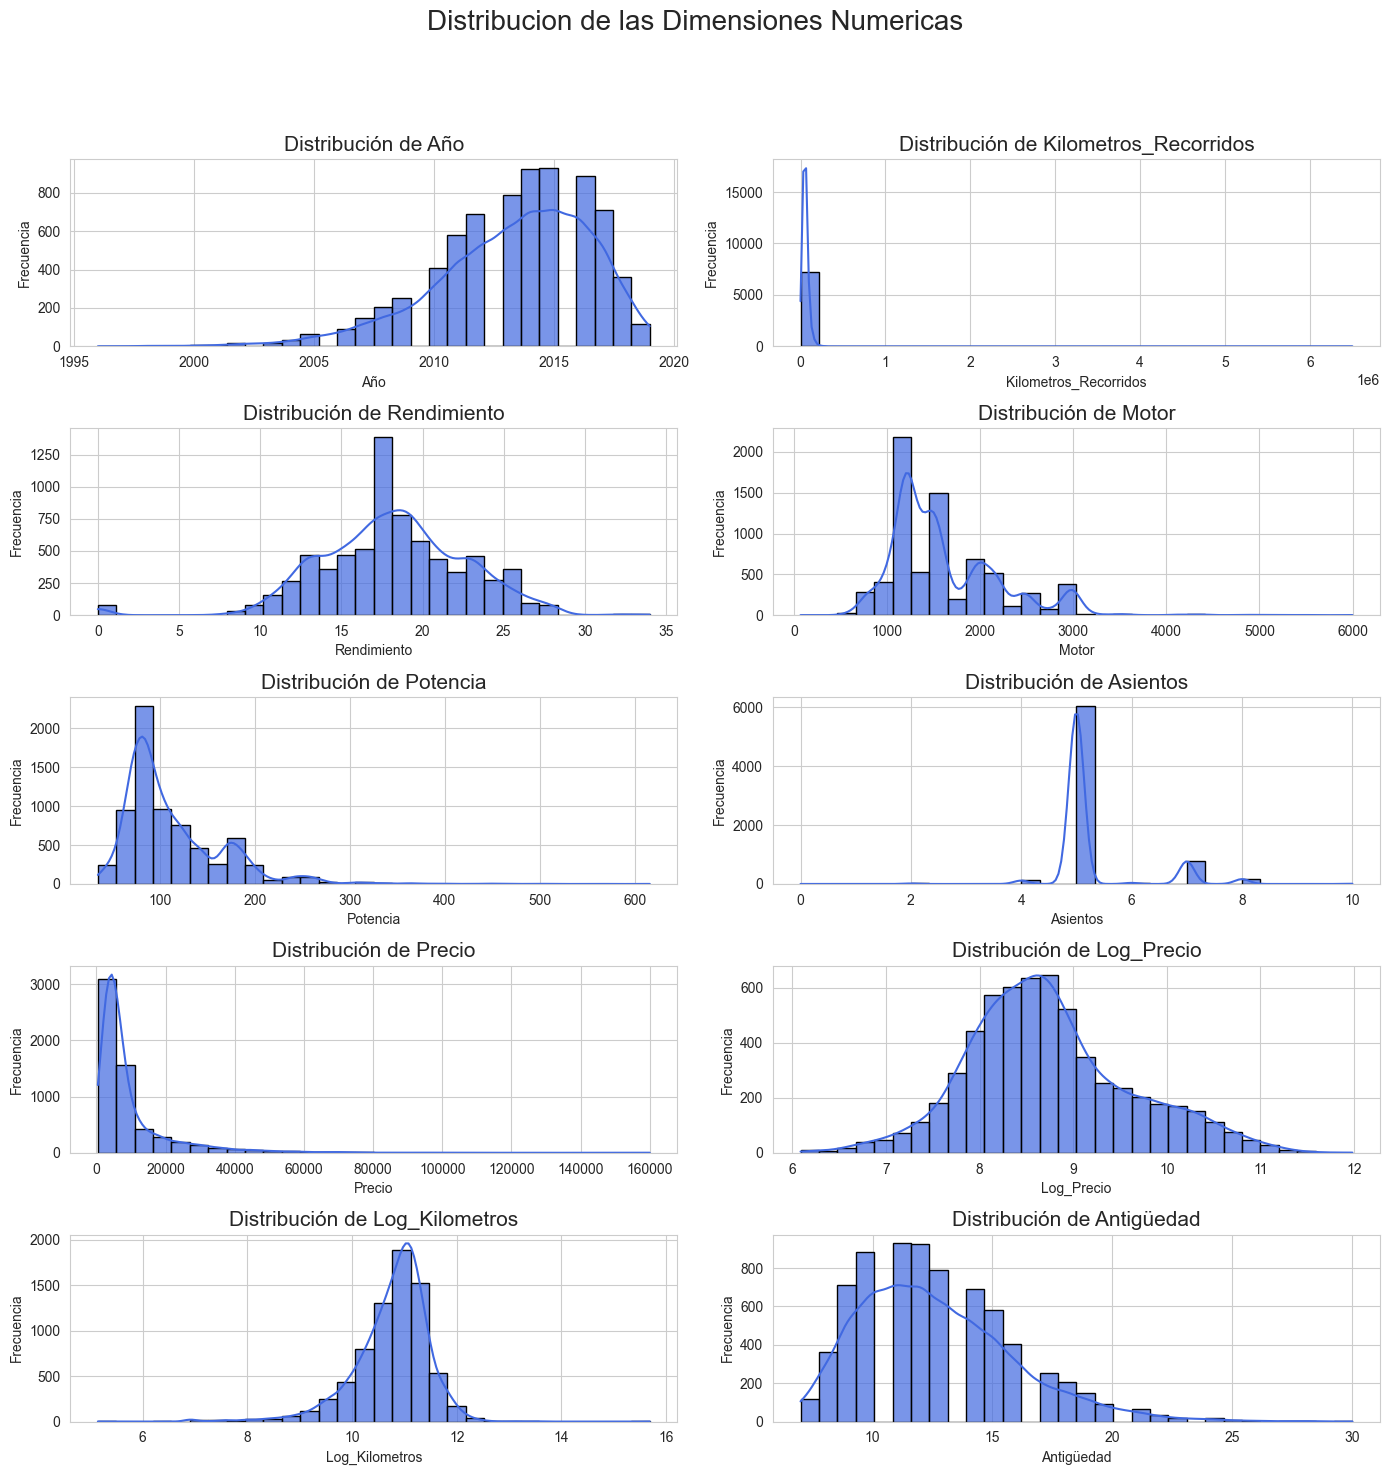

In [36]:
"""
g. Graficar la distribución de cada una de las dimensiones numéricas.
"""
distribuciones_numericas(df, columnas_numericas, n_fil=5, n_col=2, tamanio=(14, 14))

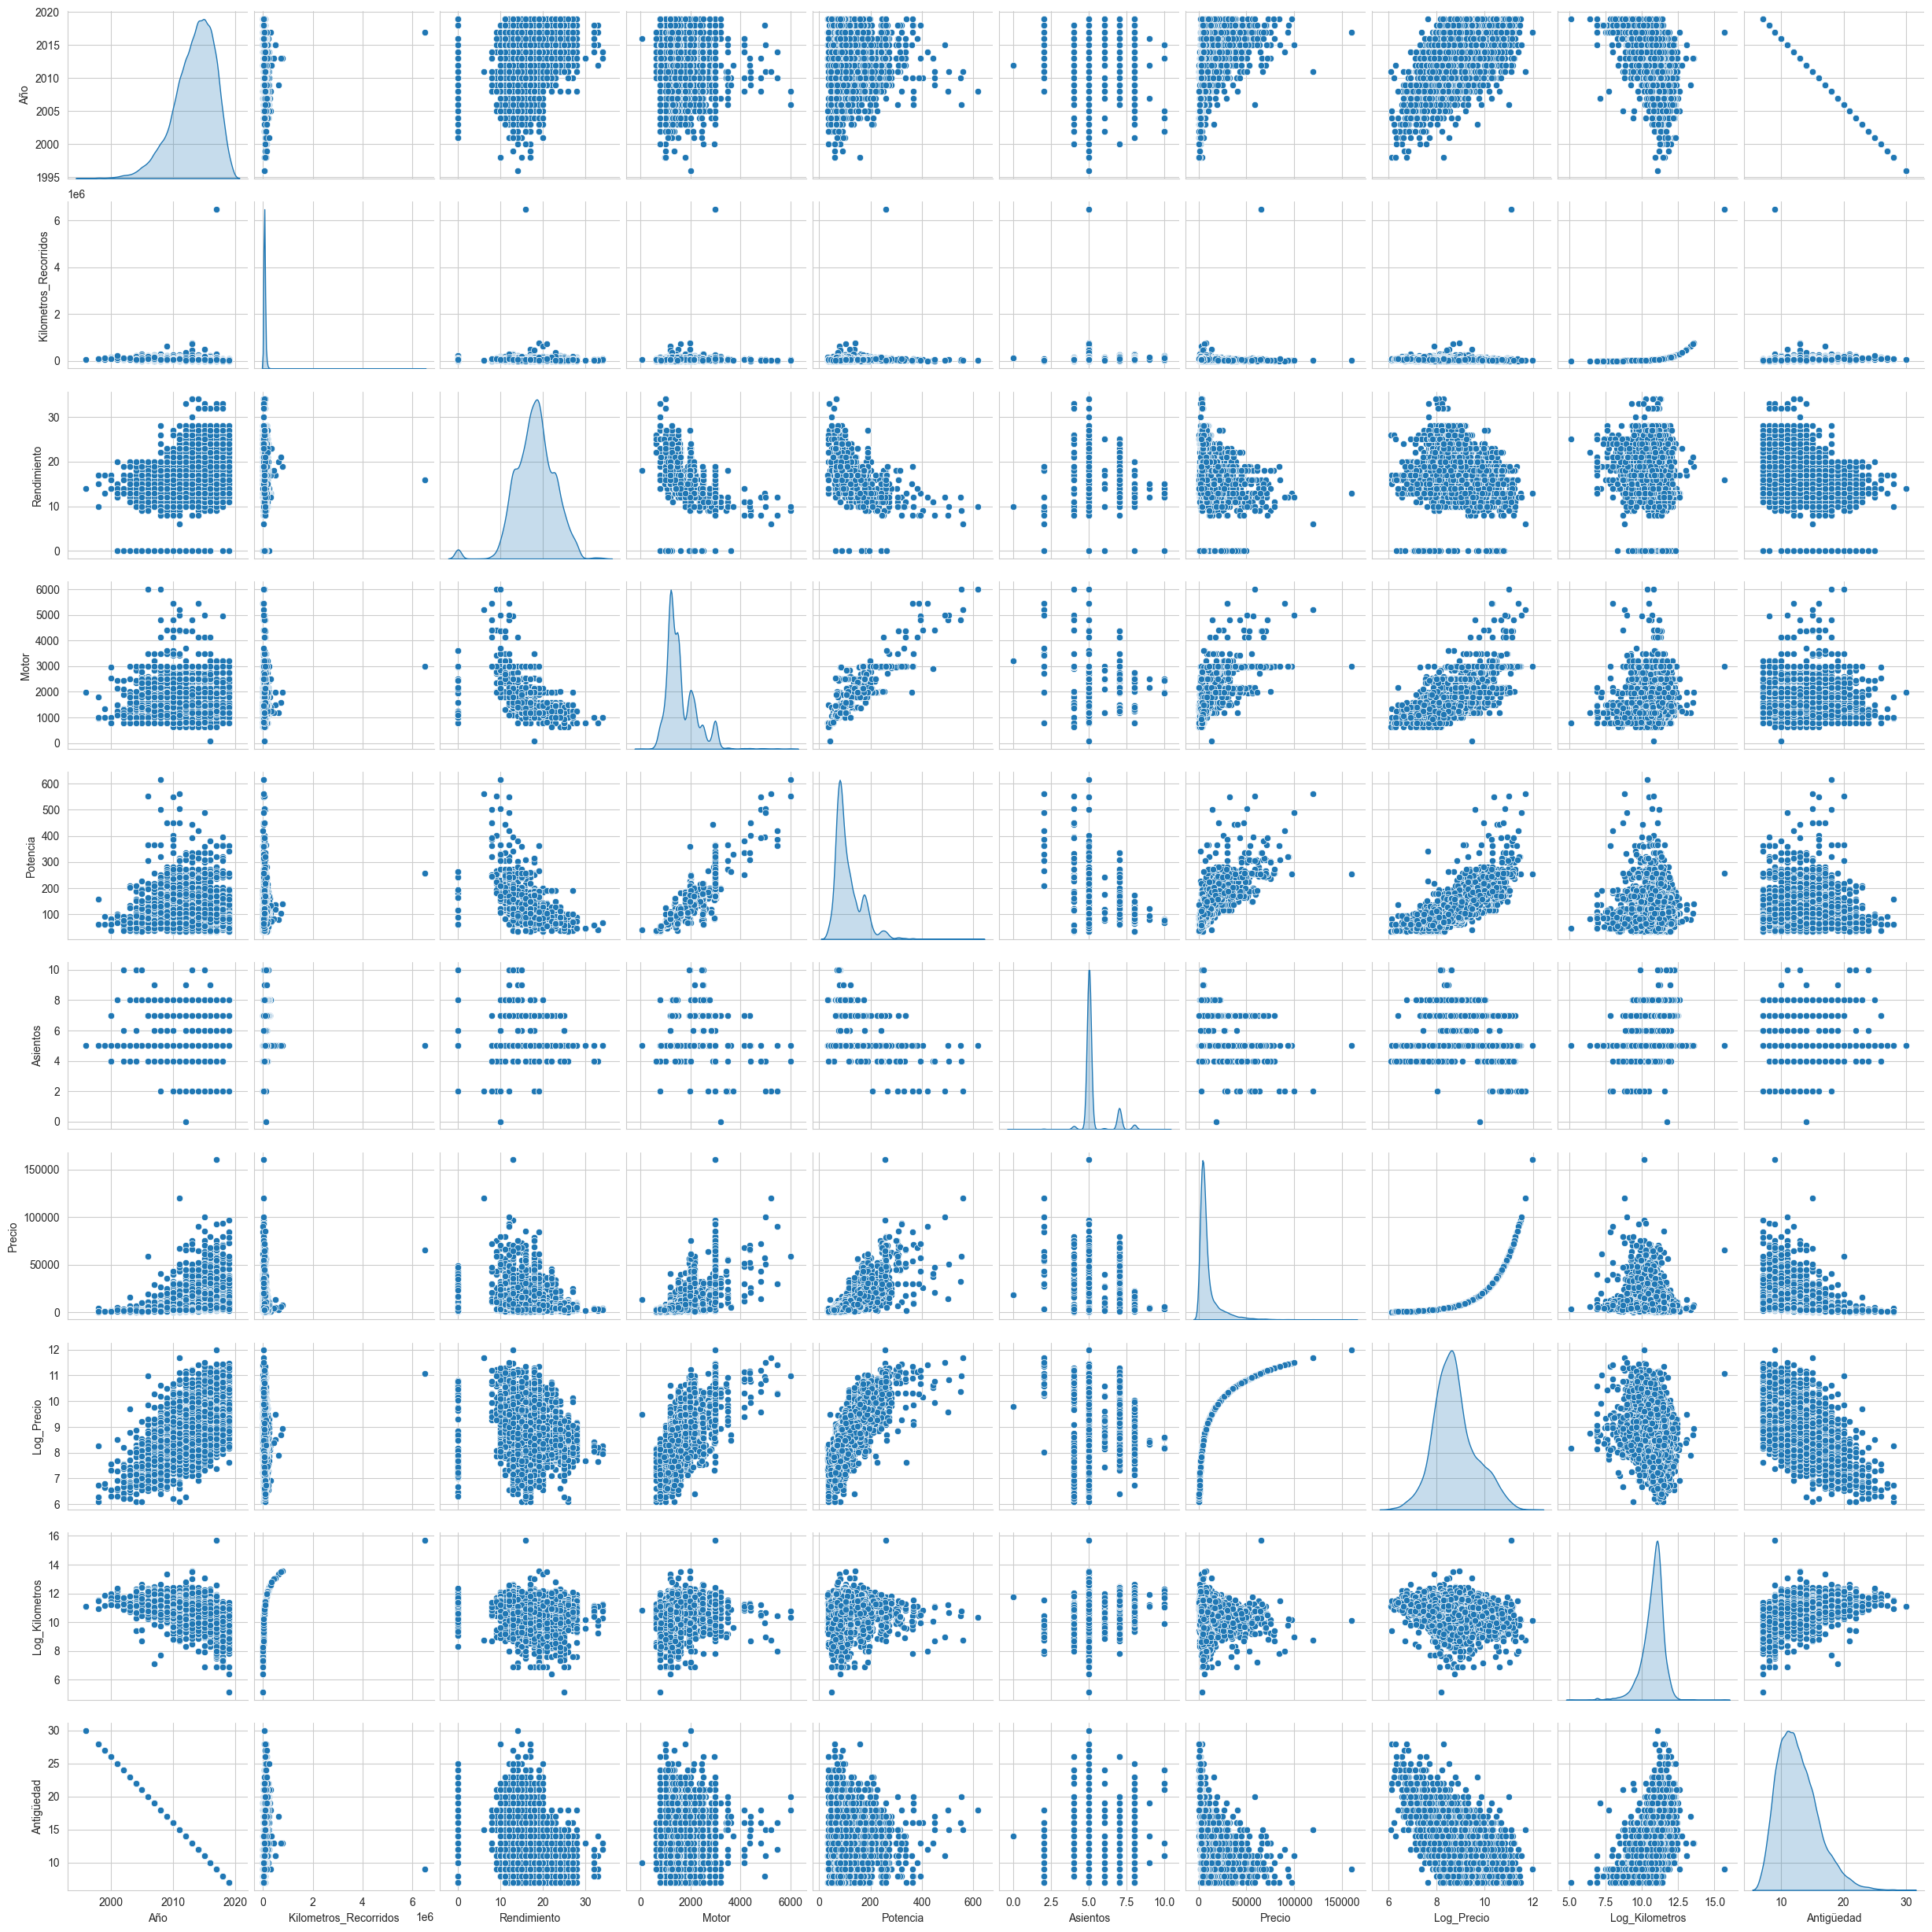

In [37]:
"""
h. Comparar entre sí cada una de las dimensiones numéricas (análisis bivariado) con un gráfico del tipo “pairplot”.
"""
# Pairplot de las columnas numericas
sns.set_style("whitegrid")

sns.pairplot(df[columnas_numericas.columns], diag_kind='kde')   # Tipos de diagonal: kde, hist
#sns.pairplot(columnas_numericas)   # Otra dorma de hacer lo mismo

plt.show()

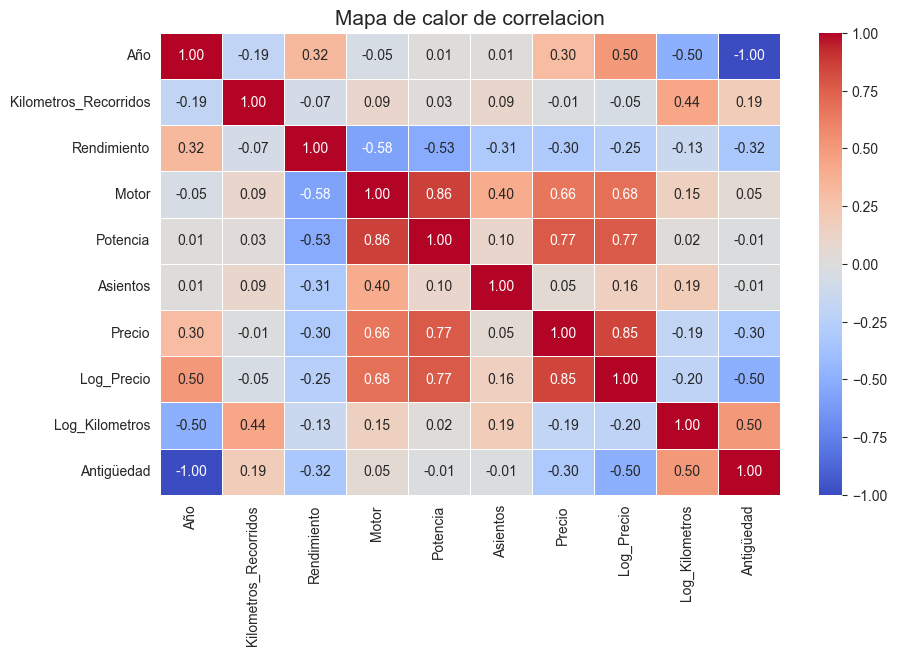

In [38]:
"""
i. Realizar un mapa de calor para identificar la correlación entre todas las variables numericas (análisis multivariado).
"""
# Calcular la matriz de correlacion
correlacion = columnas_numericas.corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titulo
plt.title('Mapa de calor de correlacion', fontsize=15)
plt.show()

In [39]:
"""
j. Graficar la distribución de cada una de las dimensiones categóricas.
"""
# Seleccionar todas las columnas categóricas
columnas_categoricas2 = df.select_dtypes(include=['object']).columns
columnas_categoricas2

Index(['Nombre', 'Ubicacion', 'Tipo_de_Combustible', 'Transmision',
       'Tipo_de_Propietario', 'Marca', 'Modelo'],
      dtype='object')

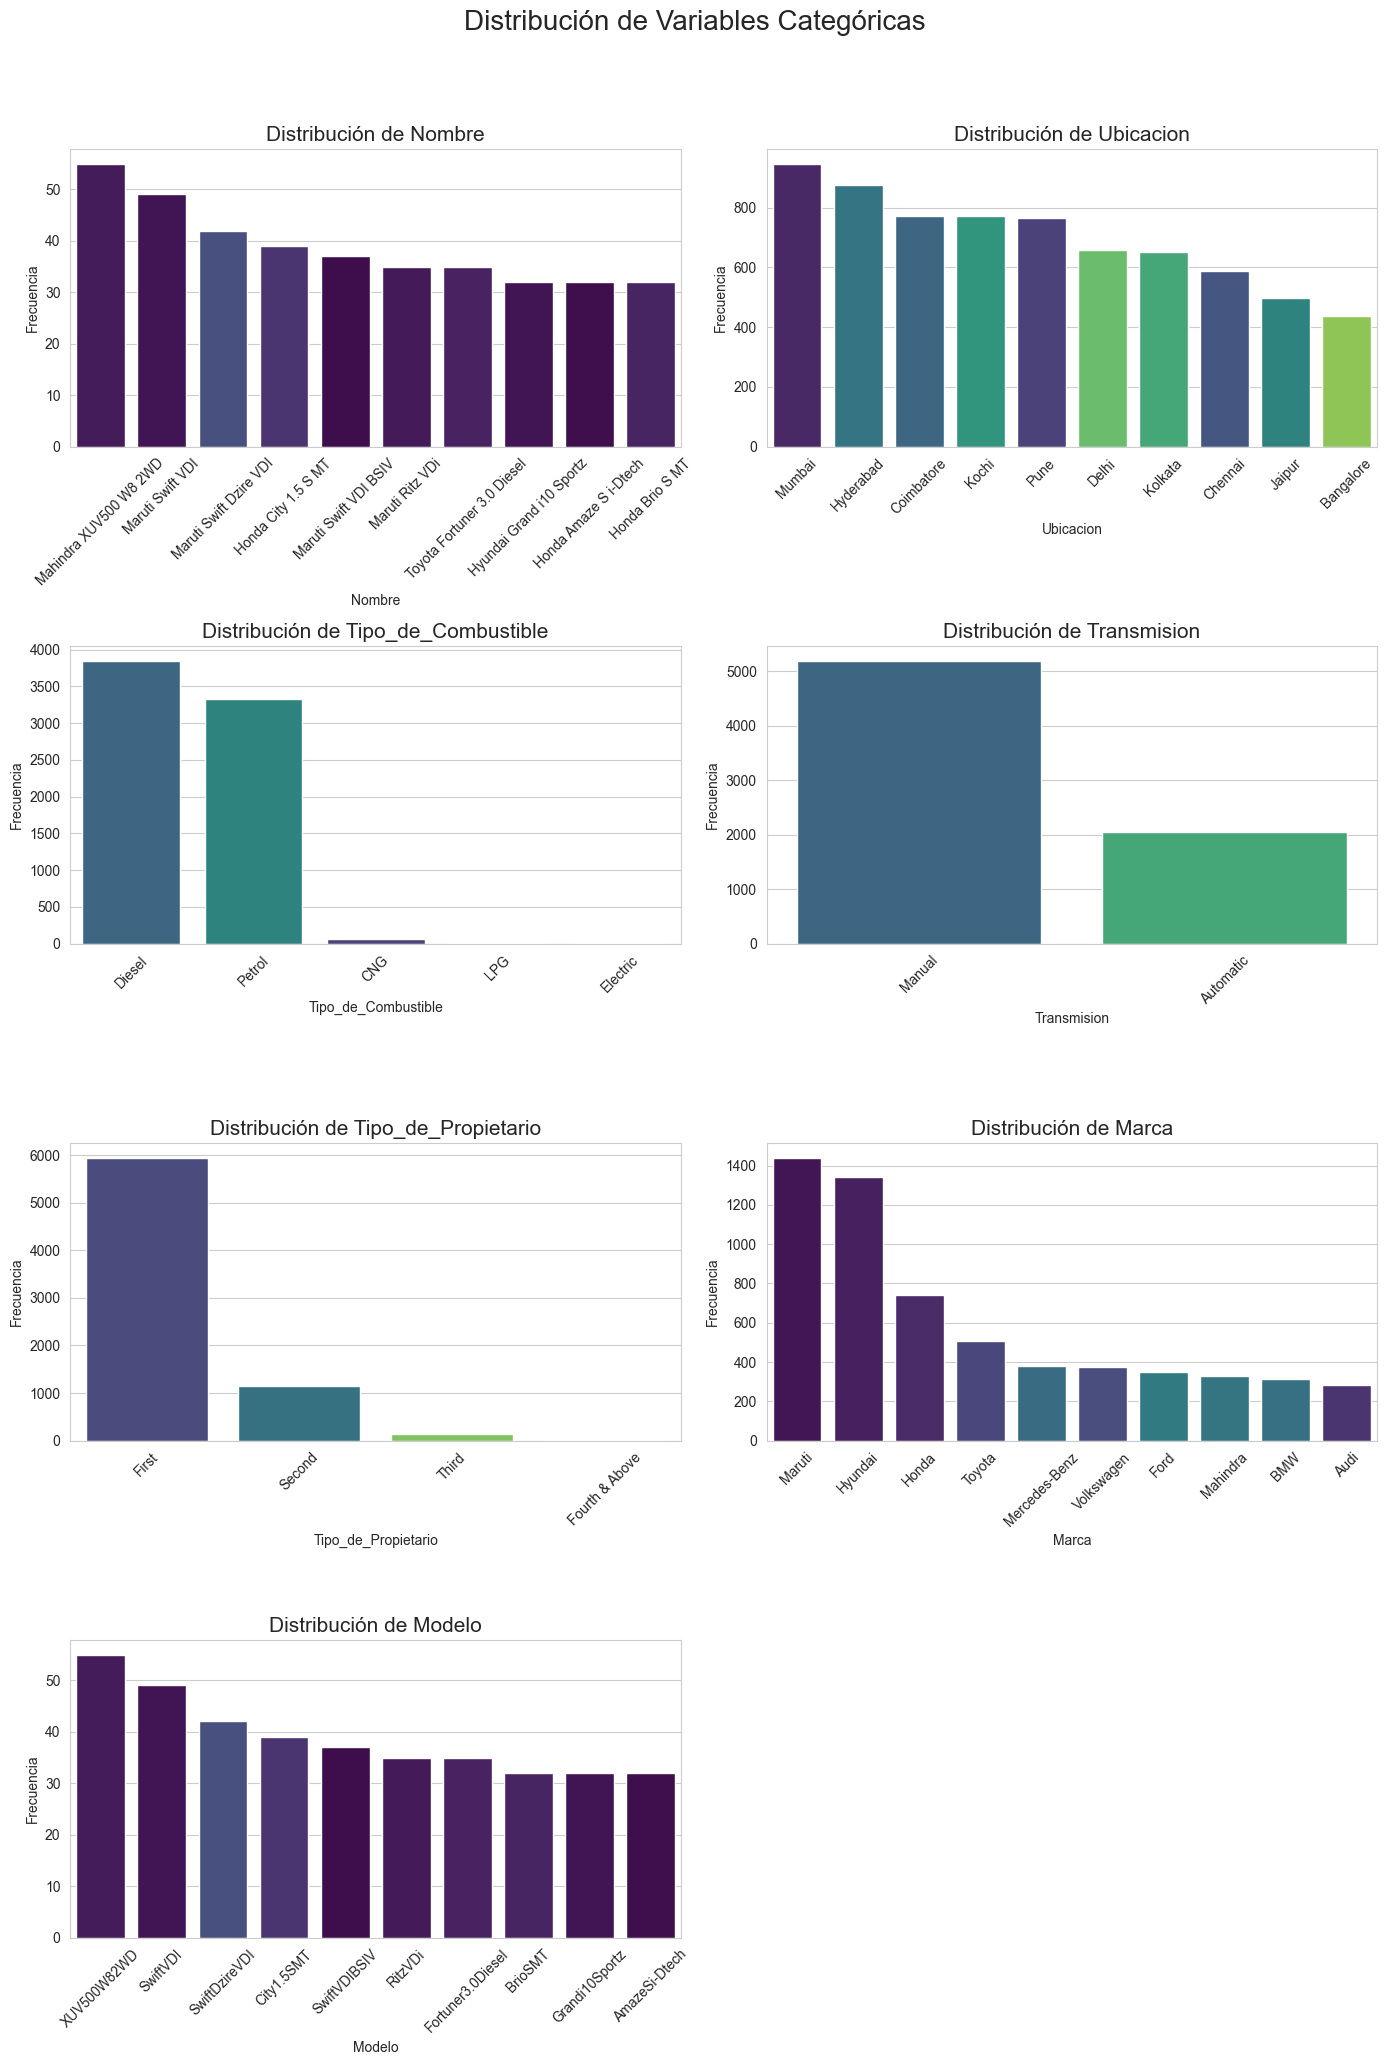

In [40]:
distribuciones_categoricas_cortas(df, columnas_categoricas2, n_fil=4, n_col=2, tamanio=(14, 20), top=10)

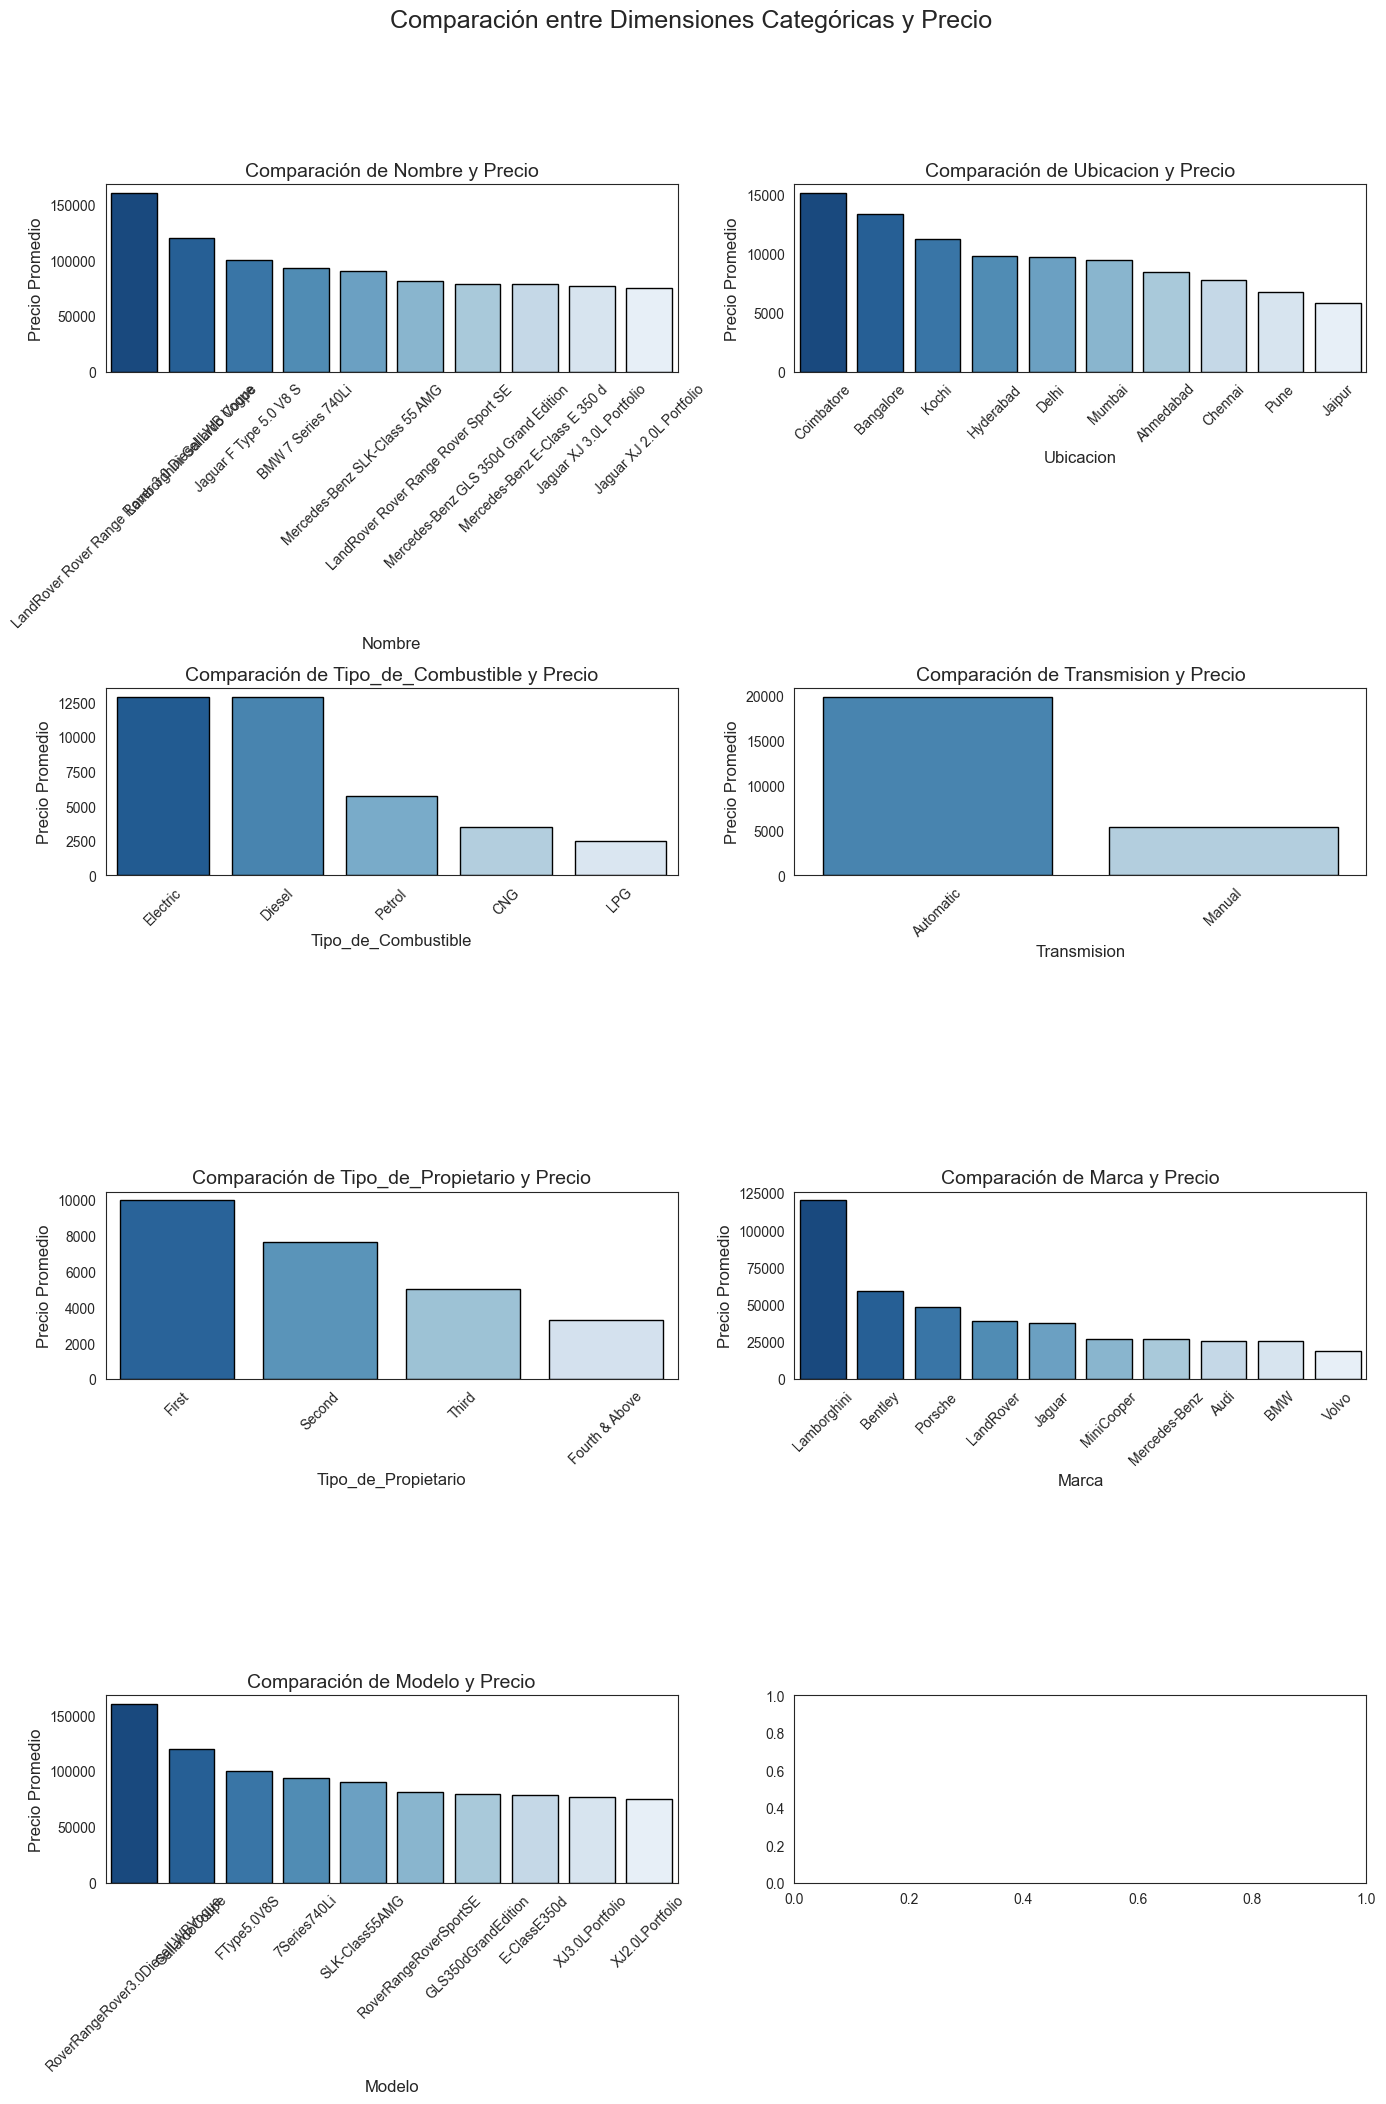

In [41]:
grafico_categoricos_y_objetivo(df, columnas_categoricas2, n_fil=4, n_col=2, tamanio=(14, 20), objetivo='Precio', top=10)

In [42]:
# Calcula la cantidad de valores nulos
valores_nulos = df.isnull().sum()
# Calcula el porcentaje de valores nulos
porcentaje_nulos = valores_nulos / len(df) * 100

tabla_nulos = pd.DataFrame({
    'Valores Nulos': valores_nulos,
    'Porcentaje Nulos': porcentaje_nulos
})

print(tabla_nulos)

                       Valores Nulos  Porcentaje Nulos
Nombre                             0          0.000000
Ubicacion                          0          0.000000
Año                                0          0.000000
Kilometros_Recorridos              0          0.000000
Tipo_de_Combustible                0          0.000000
Transmision                        0          0.000000
Tipo_de_Propietario                0          0.000000
Rendimiento                        0          0.000000
Motor                              0          0.000000
Potencia                         171          2.359597
Asientos                          47          0.648544
Precio                          1234         17.027736
Log_Precio                      1234         17.027736
Log_Kilometros                     0          0.000000
Antigüedad                         0          0.000000
Marca                              0          0.000000
Modelo                             0          0.000000


### Comparativa del Dataset antes y después de las transformaciones.

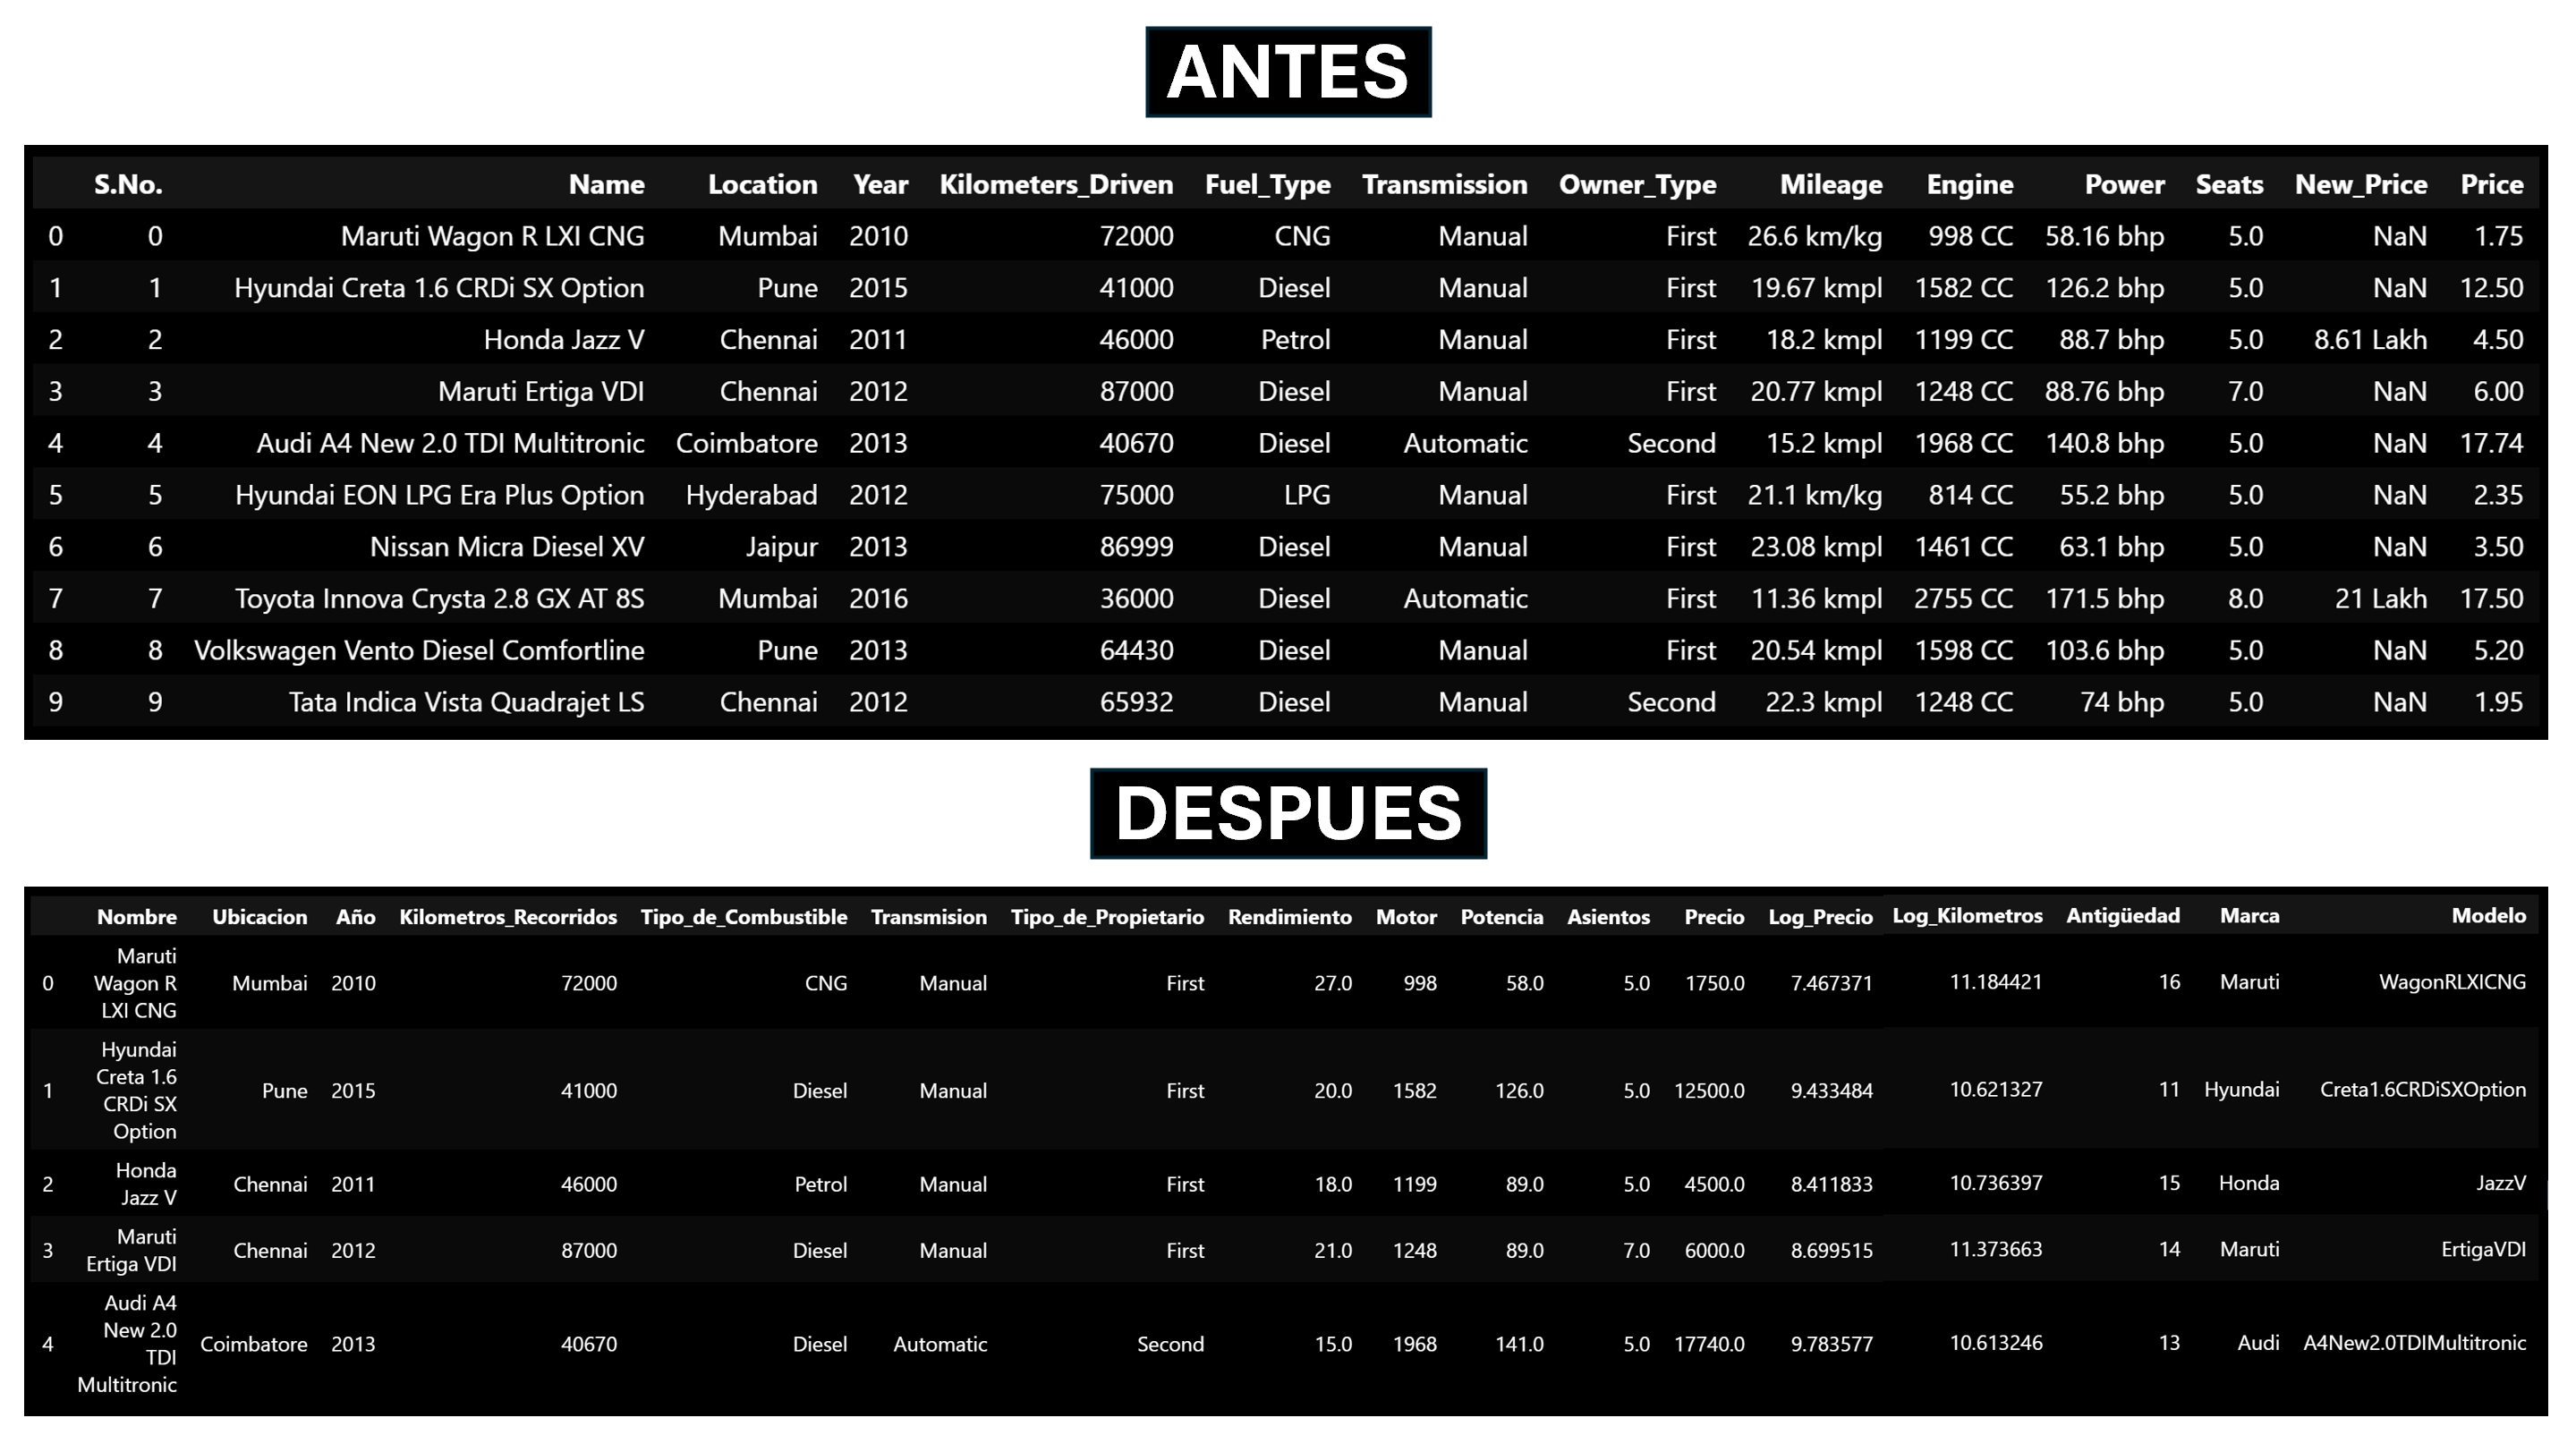